In [826]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve, auc
import itertools
from itertools import cycle
from sklearn import metrics
from scipy import interp
import os
import shutil
from keras import backend as K
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [827]:
#import PIL
#import os
#from PIL import Image

#f = r'E://box3/G/resized/128/train/G3'

#os.listdir(f)

#for file in os.listdir(f):
#    f_img = f+"/"+file
#    img = Image.open(f_img)
#    img = img.resize((80,64))
#    img.save(f_img)

In [828]:
img_width, img_height = 64, 64

train_data_dir = 'G/resized/128/train'
#validation_data_dir = '../input/main-dataset/main_dataset/validation'
test_data_dir = 'G/resized/128/test'
nb_train_samples = 150
nb_validation_samples = 60
epochs = 180
batch_size = 10
#regularizer = tf.keras.regularizers.l2(0.01,)

#if K.image_data_format() == 'channels_first':
#  input_shape = (3, img_width, img_height)
#else:
input_shape = (img_width, img_height, 3)

In [829]:
train_datagen = ImageDataGenerator(
    #rescale = 1./255,
    #shear_range = 0.3,
    #zoom_range = 0.2,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #horizontal_flip = True
)

test_datagen = ImageDataGenerator(#rescale = 1./255
)

In [830]:
train_batches = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    #classes=['EOISINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'],
    class_mode = 'categorical')

Found 155 images belonging to 3 classes.


In [831]:
test_batches = test_datagen.flow_from_directory(
    test_data_dir,
    target_size = (img_width, img_height),
    batch_size = 60,
    #color_mode = 'grayscale',
    class_mode = 'categorical')

Found 60 images belonging to 3 classes.


In [832]:
def plots(ims, figsize=(12,6), rows=None, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows +1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [833]:
imgs, labels = next(train_batches)

In [834]:
#model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [835]:
#Eoisinophil=8[1.0.0.0],Lymphocyte=4[0.1.0.0],monocyte=2[0.0.1.0],neutrophil=1[0.0.0.1]-->Labels
#plots(imgs, rows=4, titles=labels)

In [836]:
#model = Sequential()

#model.add(Conv2D(32, kernel_size=(11,11), strides= 4,
#                        padding= 'valid', activation= 'relu',
#                        input_shape= input_shape,
#                        kernel_initializer= 'he_normal'))
#model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
#                              padding= 'valid', data_format= None))

#model.add(Conv2D(256, kernel_size=(5,5), strides= 1,
#                        padding= 'same', activation= 'relu',
#                        kernel_initializer= 'he_normal'))
#model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
#                              padding= 'valid', data_format= None)) 

#model.add(Conv2D(384, kernel_size=(3,3), strides= 1,
#                        padding= 'same', activation= 'relu',
#                        kernel_initializer= 'he_normal'))

#model.add(Conv2D(384, kernel_size=(3,3), strides= 1,
#                        padding= 'same', activation= 'relu',
#                        kernel_initializer= 'he_normal'))

#model.add(Conv2D(256, kernel_size=(3,3), strides= 1,
#                        padding= 'same', activation= 'relu',
#                        kernel_initializer= 'he_normal'))

#model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
#                              padding= 'valid', data_format= None))

#model.add(Flatten())
#model.add(Dense(4096, activation= 'relu'))
#model.add(Dense(4096, activation= 'relu'))
#model.add(Dense(1000, activation= 'relu'))
#model.add(Dense(4, activation= 'softmax'))

#model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
#                    loss='categorical_crossentropy',
#                    metrics=['accuracy'])

In [837]:
#model = Sequential()

#model.add(Conv2D(filters=64, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#model.add(Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
#model.add(Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())

#model.add(Flatten())
#model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(3, activation='softmax'))

#model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
#                    loss='categorical_crossentropy',
#                    metrics=['accuracy'])

In [838]:
#model = Sequential()

#model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),activation='relu', input_shape=(64,64,3)))
#model.add(BatchNormalization())
#model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1), activation='relu', input_shape=(64,64,3)))
#model.add(BatchNormalization())
#model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1), activation='relu', input_shape=(64,64,3)))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())         
#model.add(Flatten())
#model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(3,activation='softmax'))

#model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
#                    loss='categorical_crossentropy',
#                    metrics=['accuracy'])

#model.summary()

In [839]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(64,64,3)))

model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(64,64,3)))

model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(3,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

model.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_326 (Conv2D)         (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_166 (MaxPooli  (None, 31, 31, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_327 (Conv2D)         (None, 29, 29, 64)        18496     
                                                                 
 conv2d_328 (Conv2D)         (None, 27, 27, 64)        36928     
                                                                 
 max_pooling2d_167 (MaxPooli  (None, 13, 13, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_329 (Conv2D)         (None, 11, 11, 128)     

In [840]:
%%time
h = model.fit_generator(
    train_batches,
    steps_per_epoch = 6,
    epochs = epochs,
    validation_data = test_batches,
    validation_steps = nb_validation_samples // batch_size,
    #callbacks=[
    #    tf.keras.callbacks.ModelCheckpoint(filepath = '/kaggle/working/model_{val_accuracy:.3f}.h5', save_best_only=True,
    #                                      save_weights_only=False, monitor='val_accuracy')
    #]
)

Epoch 1/180


c:\users\terraform\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


6/6 [==============================] - 3s 271ms/step - loss: 5.2544 - accuracy: 0.4000 - val_loss: 1.1817 - val_accuracy: 0.3333
Epoch 2/180
6/6 [==============================] - 1s 142ms/step - loss: 0.7040 - accuracy: 0.3091
Epoch 3/180
6/6 [==============================] - 1s 81ms/step - loss: 0.6843 - accuracy: 0.3091
Epoch 4/180
6/6 [==============================] - 1s 98ms/step - loss: 0.6411 - accuracy: 0.3667
Epoch 5/180
6/6 [==============================] - 1s 86ms/step - loss: 0.6478 - accuracy: 0.4000
Epoch 6/180
6/6 [==============================] - 1s 84ms/step - loss: 0.6688 - accuracy: 0.2833
Epoch 7/180
6/6 [==============================] - 1s 86ms/step - loss: 0.6653 - accuracy: 0.3167
Epoch 8/180
6/6 [==============================] - 1s 86ms/step - loss: 0.6626 - accuracy: 0.3667
Epoch 9/180
6/6 [==============================] - 1s 108ms/step - loss: 0.6611 - accuracy: 0.4500
Epoch 10/180
6/6 [==============================] - 1s 101ms/step - loss: 0.6810 - ac

6/6 [==============================] - 1s 106ms/step - loss: 0.2812 - accuracy: 0.8167
Epoch 80/180
6/6 [==============================] - 1s 103ms/step - loss: 0.2302 - accuracy: 0.8500
Epoch 81/180
6/6 [==============================] - 1s 104ms/step - loss: 0.3024 - accuracy: 0.8500
Epoch 82/180
6/6 [==============================] - 1s 93ms/step - loss: 0.1735 - accuracy: 0.9273
Epoch 83/180
6/6 [==============================] - 1s 88ms/step - loss: 0.2714 - accuracy: 0.8000
Epoch 84/180
6/6 [==============================] - 1s 119ms/step - loss: 0.4764 - accuracy: 0.7500
Epoch 85/180
6/6 [==============================] - 1s 100ms/step - loss: 0.1530 - accuracy: 0.9000
Epoch 86/180
6/6 [==============================] - 1s 97ms/step - loss: 0.1727 - accuracy: 0.8667
Epoch 87/180
6/6 [==============================] - 1s 99ms/step - loss: 0.1520 - accuracy: 0.9333
Epoch 88/180
6/6 [==============================] - 1s 112ms/step - loss: 2.1063 - accuracy: 0.6182
Epoch 89/180
6/6 

6/6 [==============================] - 1s 107ms/step - loss: 0.3639 - accuracy: 0.9000
Epoch 161/180
6/6 [==============================] - 1s 96ms/step - loss: 0.0240 - accuracy: 1.0000
Epoch 162/180
6/6 [==============================] - 1s 105ms/step - loss: 0.0443 - accuracy: 0.9833
Epoch 163/180
6/6 [==============================] - 1s 106ms/step - loss: 0.0241 - accuracy: 0.9833
Epoch 164/180
6/6 [==============================] - 1s 110ms/step - loss: 0.1735 - accuracy: 0.9167
Epoch 165/180
6/6 [==============================] - 1s 102ms/step - loss: 0.0935 - accuracy: 0.9667
Epoch 166/180
6/6 [==============================] - 1s 104ms/step - loss: 0.0867 - accuracy: 0.9273
Epoch 167/180
6/6 [==============================] - 1s 100ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 168/180
6/6 [==============================] - 1s 100ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 169/180
6/6 [==============================] - 1s 101ms/step - loss: 0.0117 - accuracy: 1.0000
Epoch

In [841]:
test_imgs, test_labels = next(test_batches)
#plots(test_imgs, rows=10, titles=test_labels)

In [842]:
rounded_labels = np.argmax(test_labels, axis=-1)

In [843]:
model.save('model_0.92015612.h5')
test_model = load_model('model_0.92015612.h5')

In [844]:
predictions = test_model.predict_generator(test_batches, steps=1, verbose=0)

c:\users\terraform\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [845]:
predictions

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.26614450e-08, 2.31667655e-04, 9.99257982e-01],
       [5.56984847e-10, 5.57047786e-09, 9.99999940e-01],
       [6.54472254e-10, 1.13710576e-06, 9.99874651e-01],
       [2.54064986e-07, 4.34690883e-05, 9.99701858e-01],
       [1.36646582e-14, 3.20213621e-05, 9.99475241e-01],
       [2.51397636e-04, 9.99973297e-01, 2.43404918e-09],
       [1.00000000e+00, 3.51275728e-37, 0.00000000e+00],
       [1.00000000e+00, 1.36285330e-10, 9.52670860e-18],
       [1.00000000e+00, 2.20751014e-17, 6.29823404e-26],
       [1.00000000e+00, 3.71538637e-34, 0.00000000e+00],
       [1.98467659e-10, 1.00000000e+00, 1.38995790e-22],
       [1.00000000e+00, 5.69263332e-13, 9.49694837e-12],
       [1.77125354e-08, 1.94311231e-01, 9.06061649e-01],
       [1.00000000e+00, 1.13839237e-20, 9.64936096e-37],
       [2.00667773e-06, 9.97931600e-01, 1.65765741e-04],
       [1.67752916e-16, 2.84173916e-06, 9.99747813e-01],
       [3.23824323e-04, 7.69088

In [846]:
rounded_prediction = np.argmax(predictions, axis=-1)

In [847]:
for i in rounded_prediction:
    print(i)

0
2
2
2
2
2
1
0
0
0
0
1
0
2
0
1
2
2
1
1
2
2
2
2
2
0
0
1
0
1
0
2
1
1
1
0
2
1
2
2
2
2
2
1
0
0
0
1
1
0
0
0
1
2
1
1
1
1
0
0


In [848]:
cm = confusion_matrix(y_true=rounded_labels, y_pred=rounded_prediction)

In [849]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[18  2  0]
 [ 1  9 10]
 [ 1  8 11]]


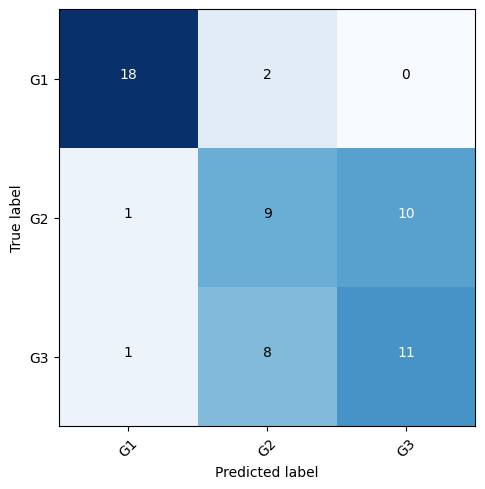

In [850]:
cm_plot_labels = ['G1','G2', 'G3']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='')

c:\users\terraform\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


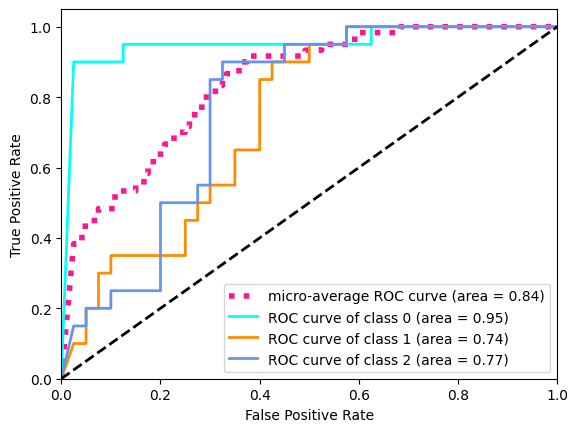

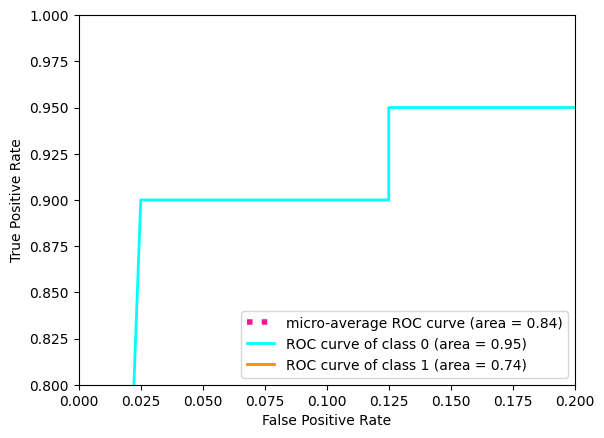

In [851]:
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)



colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)



colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



In [852]:
from sklearn.metrics import classification_report

In [853]:
print(classification_report(y_true=rounded_labels, y_pred=rounded_prediction))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.47      0.45      0.46        20
           2       0.52      0.55      0.54        20

    accuracy                           0.63        60
   macro avg       0.63      0.63      0.63        60
weighted avg       0.63      0.63      0.63        60



In [854]:
score = metrics.log_loss(test_labels,predictions)
print("Log loss score: {}".format(score))

Log loss score: 4.317571616434495


ValueError: x and y must have same first dimension, but have shapes (180,) and (1,)

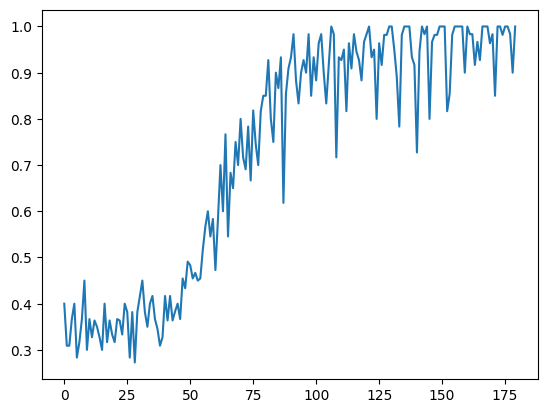

In [855]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)),accs, label = 'Training_accuracy')
plt.plot(range(len(accs)),val_accs, label = 'Validation_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
accs = h.history['loss']
val_accs = h.history['val_loss']

plt.plot(range(len(accs)),accs, label = 'Training_loss')
plt.plot(range(len(accs)),val_accs, label = 'Validation_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()